<h1><font size=12>
Weather Derivates </h1>
<h1> ENSO Indices Exploration <br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
18 Julio 2018 


### Indices data Analysis

All datasets where downloaded from the Working group on Surface Pressure. 
[Link to full datasets](https://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/)

##### Southern Oscillation Index (SOI)

In [1]:
########  Southern Oscillation Index (SOI) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/soi.dat'):
    ! wget https://crudata.uea.ac.uk/cru/data/soi/soi.dat -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
soi=pd.read_csv(StringIO(''.join(l.replace('   ', '  ') for l in open('../datasets/soi.dat'))),sep='  ',header=None, names=columnNames, skipfooter=1  )

soiMonth=soi.drop(columns='Anual')
soiMonth.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1866,-0.62,-0.12,-0.62,-0.65,0.04,-0.82,-0.34,0.36,-0.18,0.07,1.10,-0.16
1867,0.09,-0.01,-0.09,0.83,0.50,-0.48,0.44,0.34,0.12,-0.56,-0.65,-0.89
1868,-0.16,-0.34,-1.56,0.30,-1.34,-2.20,-0.40,-1.41,-1.23,-1.24,-1.49,0.52
1869,-1.90,-0.26,-0.59,2.12,1.40,1.53,1.42,0.94,0.12,0.85,0.56,0.42
1870,1.06,0.18,-0.75,0.47,-0.11,-1.10,0.17,0.98,-0.00,-0.58,-0.86,-1.29


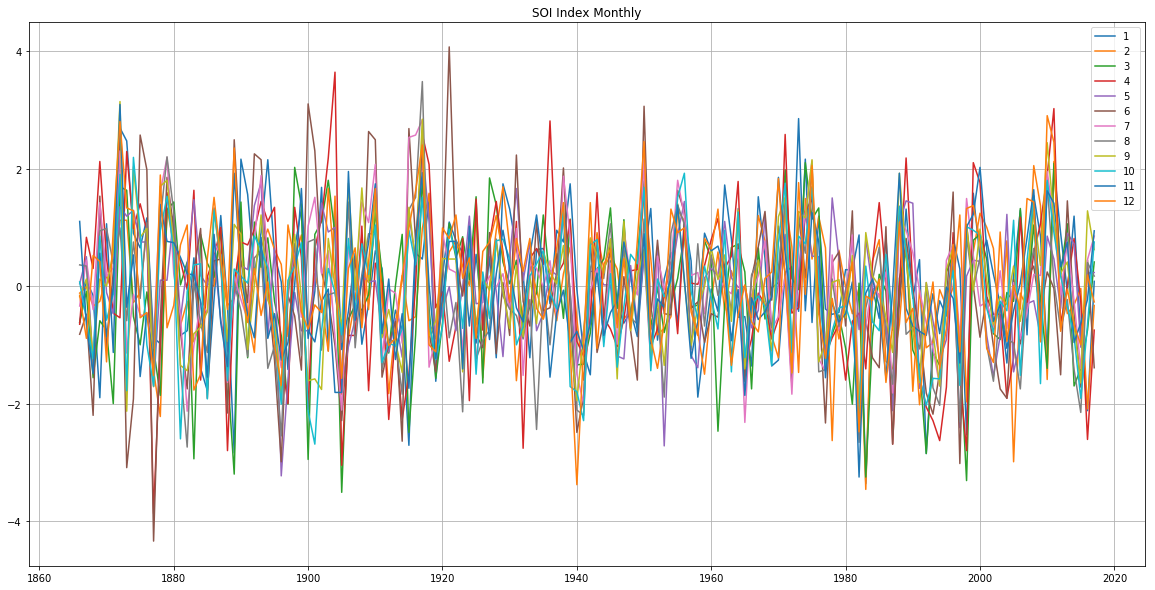

In [117]:
dates = pd.date_range('1866-01', periods=soiMonth.shape[0]*soiMonth.shape[1], freq='M')

soiMonth.plot(figsize=(20,10),grid=True, title='SOI Index Monthly')

Text(0,0.5,'Index Value')

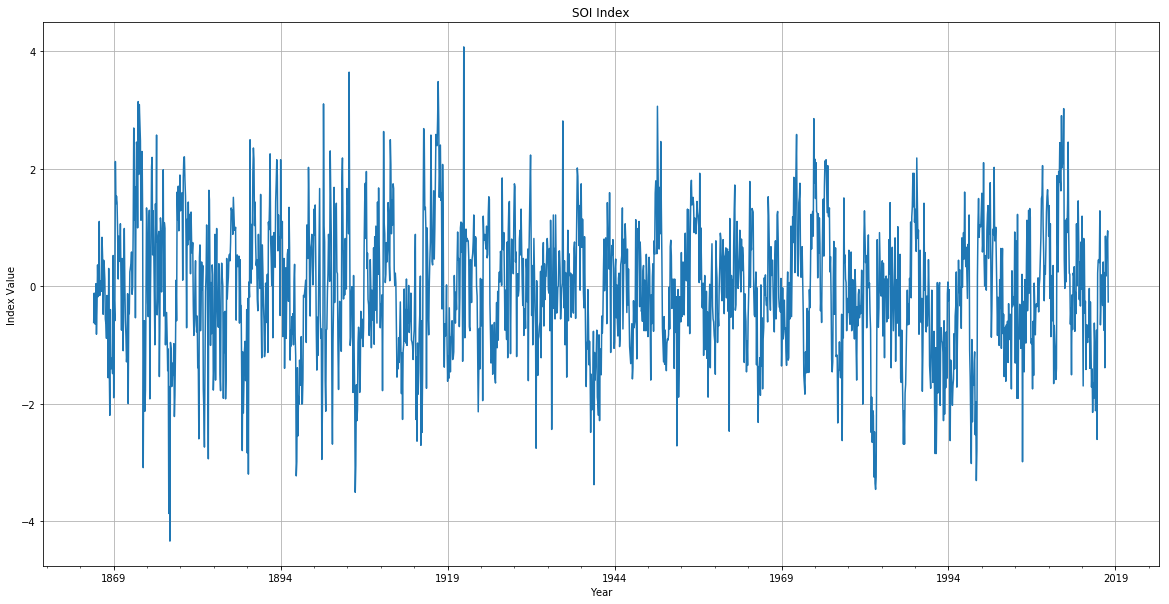

In [118]:
soiMonth.columns=range(1,13)

soiAllTime=soiMonth.stack()

soiAllTime.columns=range(1,13)
year=soiAllTime.index.get_level_values(0).values
month=soiAllTime.index.get_level_values(1).values

soiAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

soiPlotAll = soiAllTime.plot(title='SOI Index',figsize=(20,10),grid=True)

soiPlotAll.set_xlabel('Year')
soiPlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

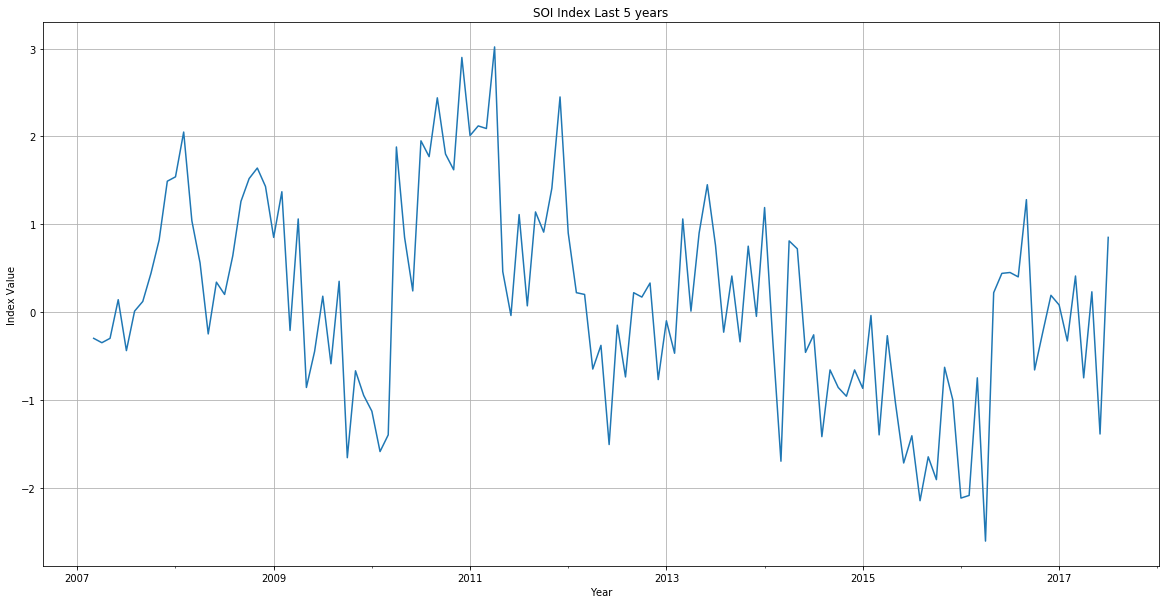

In [121]:
# Choose only last 5 years.
soiTime = pd.Series(soiAllTime.iloc[-130:-5])
soiPlot=soiTime.plot(figsize=(20,10),title='SOI Index Last 5 years',grid=True)
soiPlot.set_xlabel('Year')
soiPlot.set_ylabel('Index Value')

##### North Atlantic Oscillation (NAO)

In [14]:
########  North Atlantic Oscillation (NAO) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/nao.dat'):
    ! wget https://crudata.uea.ac.uk/cru/data/nao/nao.dat -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
nao=pd.read_csv(StringIO(''.join(l.replace('   ', '  ') for l in open('../datasets/nao.dat'))),sep='  ',header=None,skiprows=[0,1,2,3,4], names=columnNames, skipfooter=1,  )

naoMonth=nao.drop(columns='Anual')
naoMonth.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1826,-3.05,4.87,-0.97,1.78,-1.20,0.83,1.89,2.72,-0.76,0.18,-2.41,-0.59
1827,-0.45,-3.72,1.83,-0.83,1.20,-0.07,2.02,-3.56,-0.07,-3.02,-1.42,2.70
1828,1.27,0.37,-0.18,0.04,-1.59,-1.33,-4.40,-2.54,-2.78,0.10,-2.57,3.04
1829,-2.48,0.32,-2.54,0.12,1.80,-0.10,0.33,0.77,0.78,0.71,-0.33,-0.43
1830,-2.33,1.20,3.58,3.08,-0.05,-0.85,3.19,-0.35,2.04,2.04,2.19,-3.13


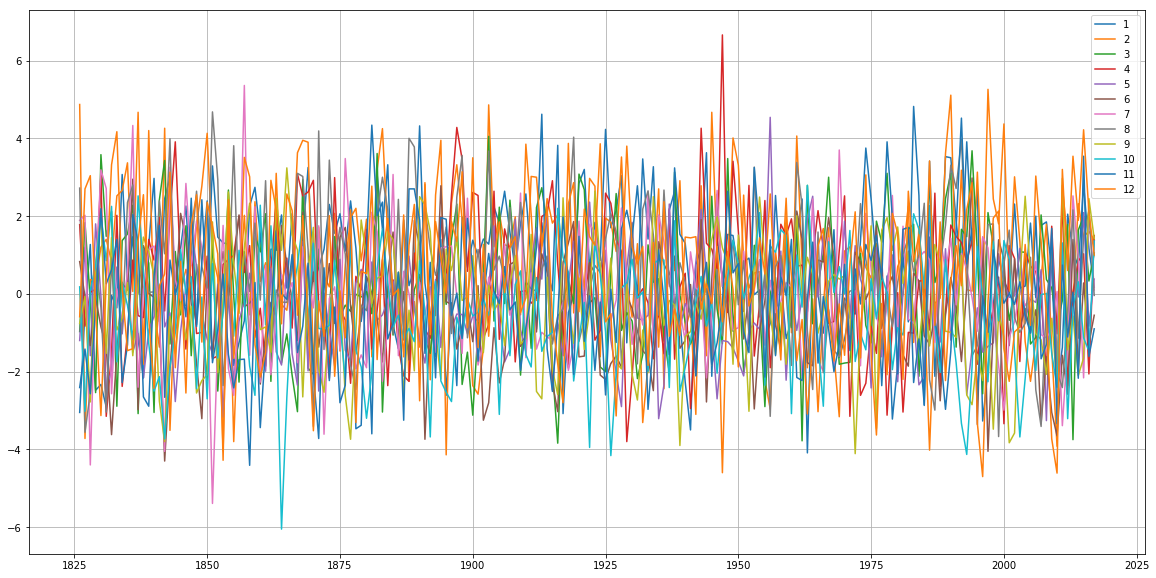

In [114]:
datesNao = pd.date_range('1826-01', periods=naoMonth.shape[0]*naoMonth.shape[1], freq='M')
naoMonth.plot(figsize=(20,10),grid=True)

Text(0,0.5,'Index Value')

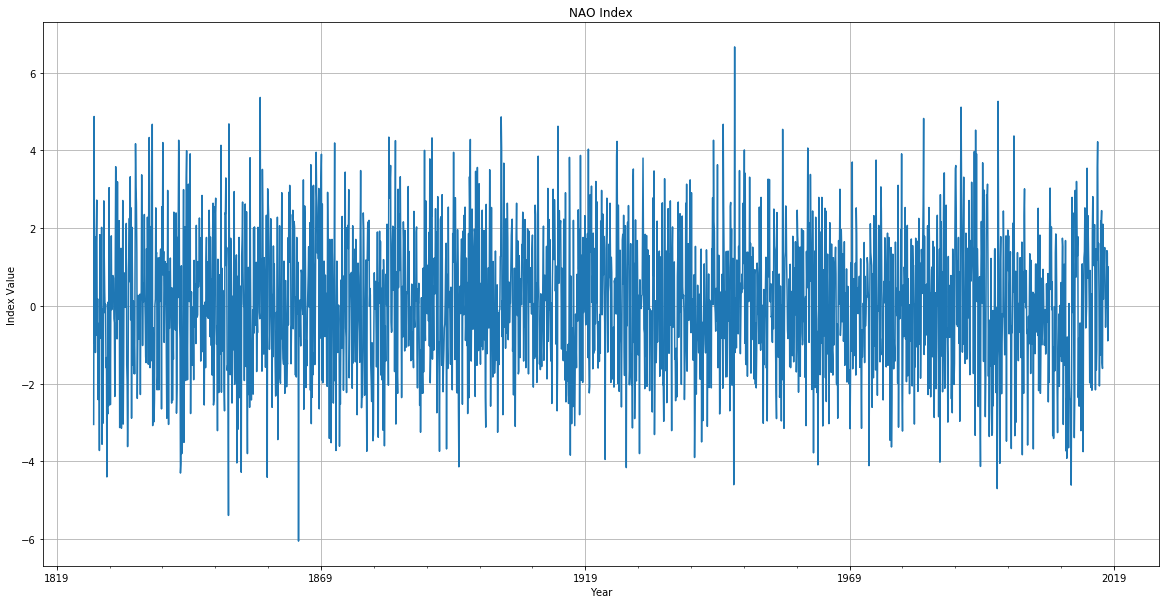

In [115]:
naoMonth.columns=range(1,13)

naoAllTime=naoMonth.stack()

naoAllTime.columns=range(1,13)
year=naoAllTime.index.get_level_values(0).values
month=naoAllTime.index.get_level_values(1).values

naoAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

naoPlotAll= naoAllTime.plot(title='NAO Index',figsize=(20,10),grid=True)

naoPlotAll.set_xlabel('Year')
naoPlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

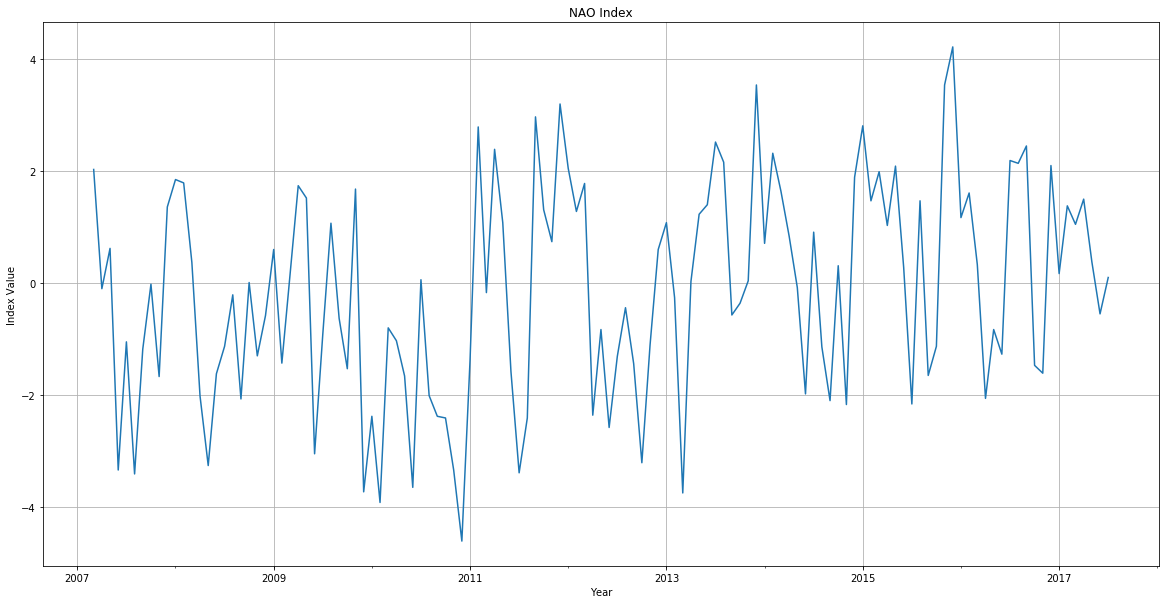

In [122]:
naoTime = pd.Series(naoAllTime.iloc[-130:-5])

naoPlot = naoTime.plot(figsize=(20,10),title='NAO Index',grid=True)

naoPlot.set_xlabel('Year')
naoPlot.set_ylabel('Index Value')

##### Niño 3.4 Index (Nino34)

In [143]:
########  Southern Oscillation Index (SOI) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/nino34.dat'):
    ! wget https://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nino34.long.anom.data -O ../datasets/nino34.dat

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
nino34=pd.read_csv(StringIO(''.join(l.replace('    ', '   ') for l in open('../datasets/nino34.dat'))),sep='   ',header=None,skiprows=[0], names=columnNames, skipfooter=8,  )
nino34Month=nino34
nino34Month.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


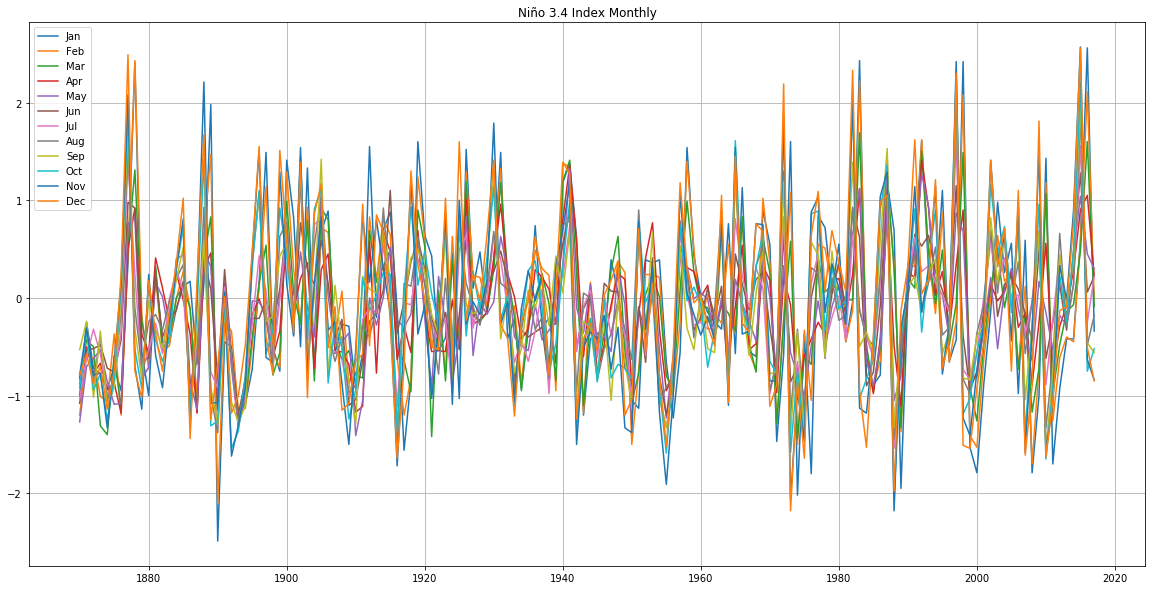

In [144]:
dates = pd.date_range('1870-01', periods=nino34Month.shape[0]*nino34Month.shape[1], freq='M')

nino34Month.plot(figsize=(20,10),grid=True, title='Niño 3.4 Index Monthly')

Text(0,0.5,'Index Value')

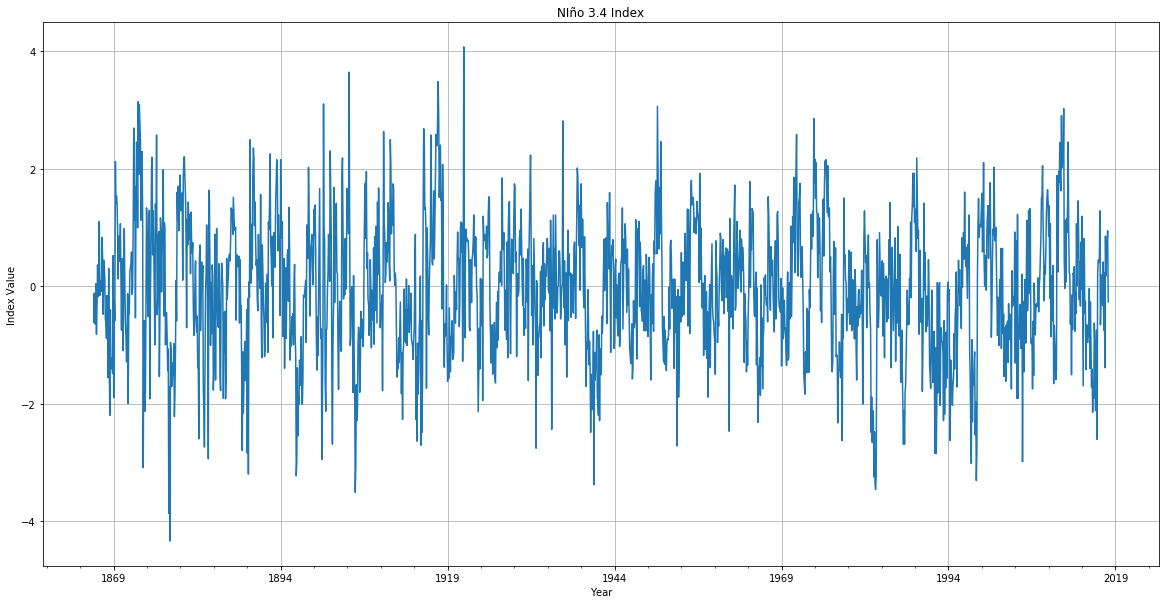

In [145]:
nino34Month.columns=range(1,13)

nino34AllTime=nino34Month.stack()

nino34AllTime.columns=range(1,13)
year=nino34AllTime.index.get_level_values(0).values
month=nino34AllTime.index.get_level_values(1).values

nino34AllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

nino34PlotAll = soiAllTime.plot(title='NIño 3.4 Index',figsize=(20,10),grid=True)

nino34PlotAll.set_xlabel('Year')
nino34PlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

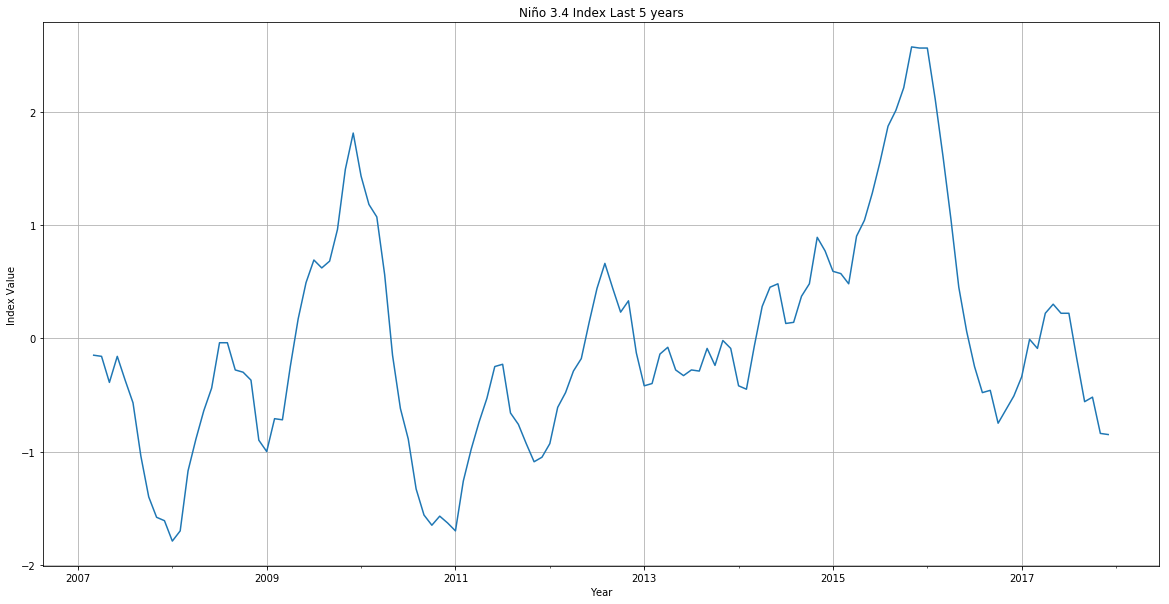

In [146]:
# Choose only last 5 years.
nino34Time = pd.Series(nino34AllTime.iloc[-130:])
nino34Plot=nino34Time.plot(figsize=(20,10),title='Niño 3.4 Index Last 5 years',grid=True)
nino34Plot.set_xlabel('Year')
nino34Plot.set_ylabel('Index Value')


## Rainfall Data Analysis

In [19]:
# Download the update dataset.
import os
if not os.path.exists('../datasets/pr_1901_2015.xls'):
    ! wget http://sdwebx.worldbank.org/climateportal/DownloadData/pr_1901_2015.xls -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
worldBank=pd.read_excel('../datasets/pr_1901_2015.xls',index_col=1)

worldBank.head()


Populating the interactive namespace from numpy and matplotlib


,pr,Month,Country,ISO3,ISO2
Year,,,,,
1901,92.5029,1,COL,NaN,NaN
1901,108.6280,2,COL,NaN,NaN
1901,159.7820,3,COL,NaN,NaN
1901,204.2990,4,COL,NaN,NaN
1901,283.6320,5,COL,NaN,NaN


In [20]:
print(worldBank.columns)

worldBankMonth=worldBank.drop(columns=[' Country',' ISO3',' ISO2'])

datesWorldBank = pd.date_range('1901-01', periods=worldBank.shape[0], freq='M')

worldBankAllTime= pd.Series(np.asarray(worldBankMonth['pr']),index=datesWorldBank) 


Index(['pr', ' Month', ' Country', ' ISO3', ' ISO2'], dtype='object')


Text(0,0.5,'Precipitation Amount (mm)')

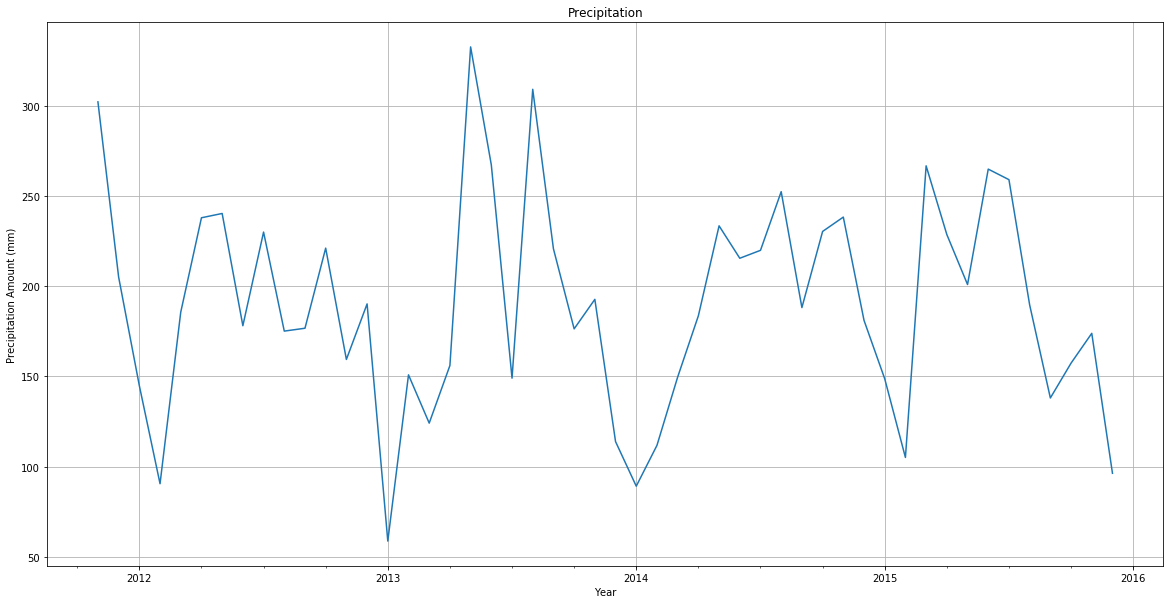

In [101]:
# Choose only 5 last years values.
worldBankTime = pd.Series(worldBankAllTime.iloc[-50:])

worldBankPlot = worldBankTime.plot(figsize=(20,10),title='Precipitation',grid=True)

worldBankPlot.set_xlabel('Year')
worldBankPlot.set_ylabel('Precipitation Amount (mm)')

## Contrasting precipitation with Climate Indices

Text(0,0.5,'Index Value')

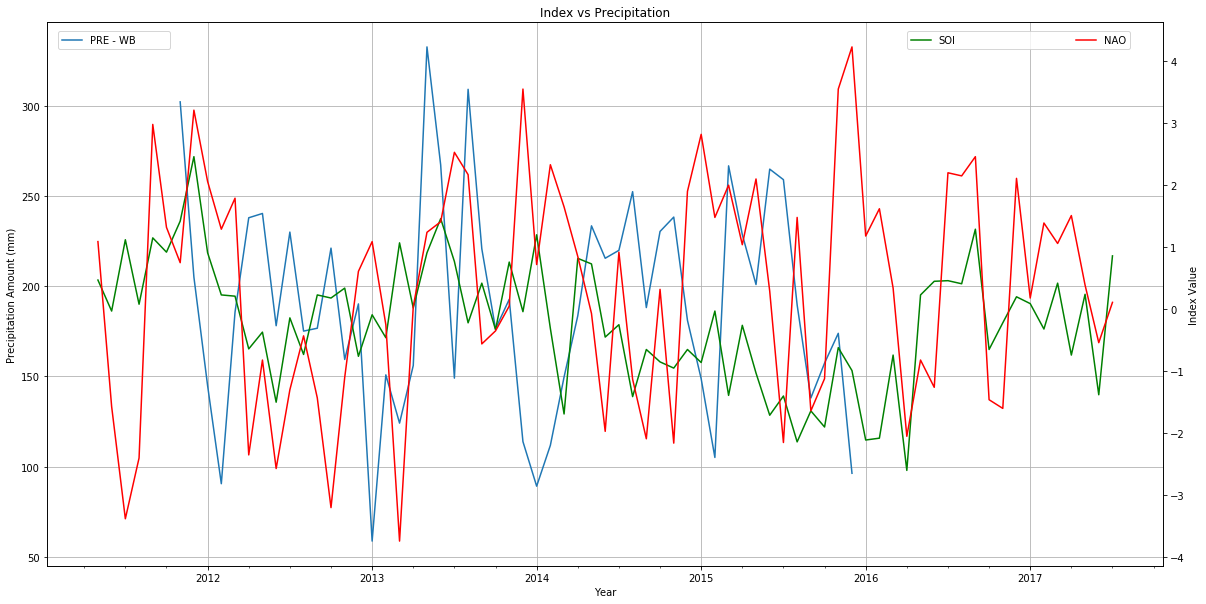

In [105]:
ax1=worldBankTime.plot(figsize=(20,10),label='PRE - WB',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.1, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

soiTime.plot(ax=ax2,color='green',label='SOI')
plt.legend(bbox_to_anchor=(0.1, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
naoTime.plot(ax=ax2,color='red',label='NAO')

plt.legend(bbox_to_anchor=(0.77, 0.95, 0.2, .8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

## Ideam Data - Cundinamarca

In [90]:

# Download the update dataset.
import os
if not os.path.exists('../datasets/Precipitacion_Totales_Mensuales.csv'):
    ! wget https://www.datos.gov.co/api/views/mb4n-6m2g/rows.csv -O ../datasets/Precipitacion_Totales_Mensuales.csv 

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
ideamPre=pd.read_csv('../datasets/Precipitacion_Totales_Mensuales.csv')

ideamEstacion = ideamPre.loc[ideamPre['ESTACIÓN']=='El Salitre']

print(ideamEstacion.columns)
ideamEstacion.drop(['CÓDIGO','X=N','Y=E','MUNICIPIO','CUENCA','ESTACIÓN'],axis=1,inplace=True)
ideamEstacion.set_index('AÑO',drop=True,inplace=True)
ideamEstacion.head(10)

Populating the interactive namespace from numpy and matplotlib
Index(['ESTACIÓN', 'CÓDIGO', 'X=N', 'Y=E', 'MUNICIPIO', 'CUENCA', 'AÑO',
       'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype='object')


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
AÑO,,,,,,,,,,,,
1955,0.0,0.0,0.0,207.3,57.4,87.0,45.8,49.6,102.2,254.6,175.5,67.2
1956,45.1,86.7,80.8,52.4,81.4,85.1,50.0,17.0,61.2,212.6,101.8,73.1
1957,0.0,20.2,38.4,77.9,35.0,23.7,46.1,49.1,32.5,91.7,80.2,52.6
1958,52.8,44.5,52.4,44.1,64.8,79.4,34.7,55.0,20.7,100.8,75.3,36.8
1959,6.8,49.2,35.9,82.3,136.6,51.2,64.4,55.4,45.3,59.1,84.3,19.4
1960,61.6,33.8,62.2,153.4,73.4,91.5,60.2,28.8,48.6,124.5,22.7,88.8
1961,16.5,2.0,51.3,64.4,7.8,63.8,22.2,21.2,52.6,147.2,101.3,10.3
1962,43.1,41.0,54.7,76.4,84.1,80.8,47.5,56.7,28.6,64.1,198.9,48.9
1963,0.0,31.4,8.7,0.0,30.4,57.7,52.9,65.0,1.7,69.5,108.9,31.7


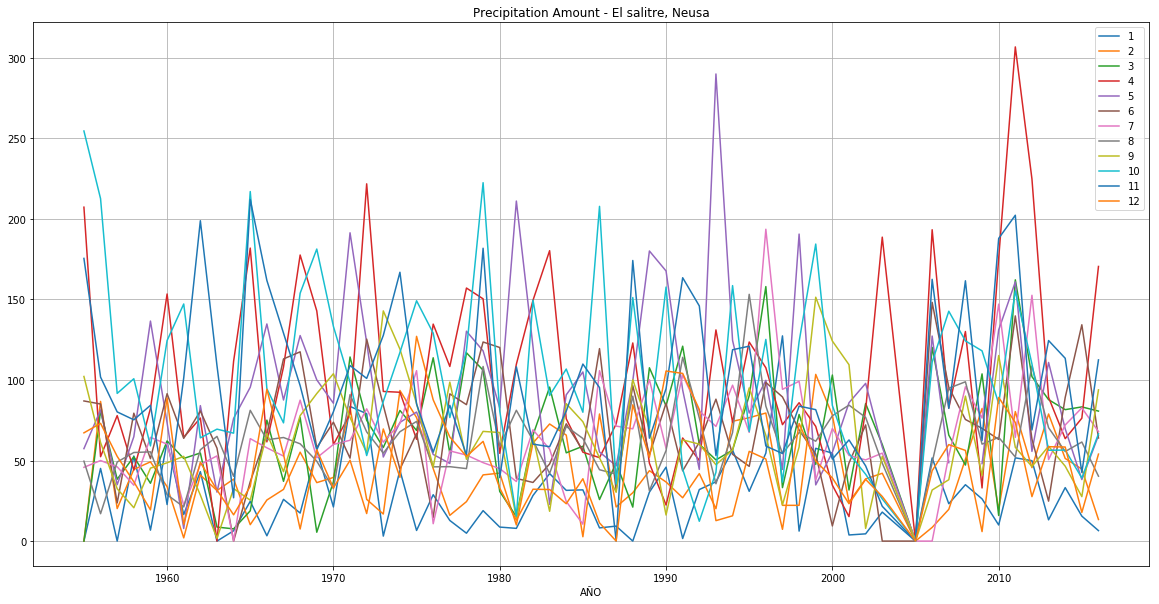

In [100]:
datesIdeamEstacion = pd.date_range('1955-01', periods=ideamEstacion.shape[0]*ideamEstacion.shape[1], freq='M')
ideamEstacion.plot(figsize=(20,10),title='Precipitation Amount - El salitre, Neusa',grid=True)

Text(0,0.5,'Amount (mm)')

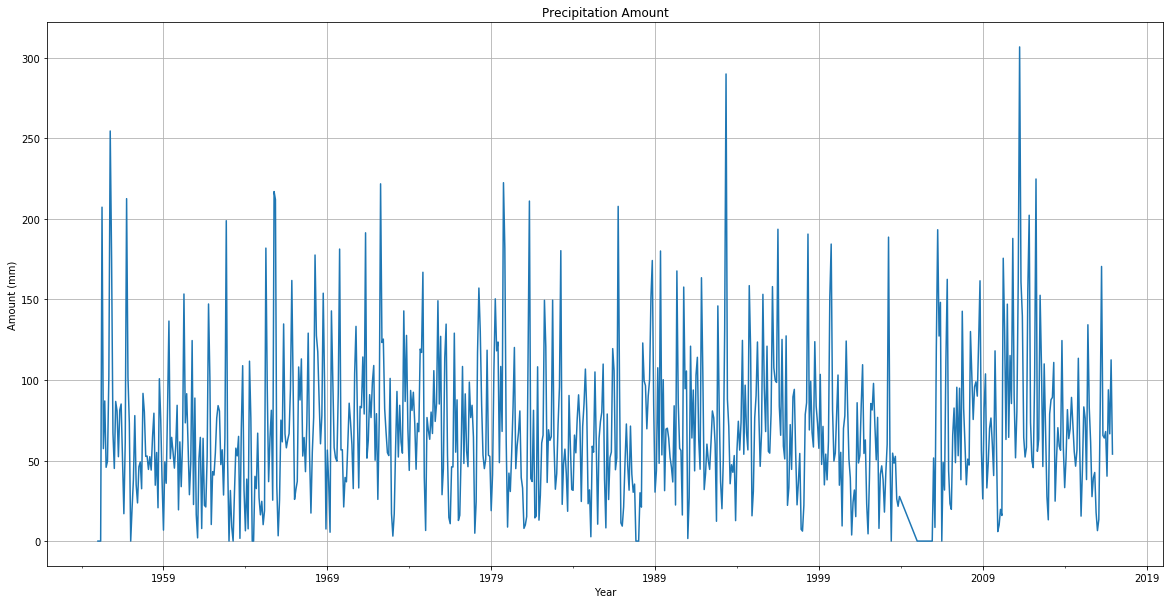

In [96]:
ideamEstacion.columns=range(1,13)

ideamEstacionAllTime=ideamEstacion.stack()

ideamEstacionAllTime.columns=range(1,13)
year=ideamEstacionAllTime.index.get_level_values(0).values
month=ideamEstacionAllTime.index.get_level_values(1).values

ideamEstacionAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

ideamEstacionPlotAll= ideamEstacionAllTime.plot(title='Precipitation Amount',figsize=(20,10),grid=True)

ideamEstacionPlotAll.set_xlabel('Year')
ideamEstacionPlotAll.set_ylabel('Amount (mm)')

Text(0,0.5,'Amount (mm)')

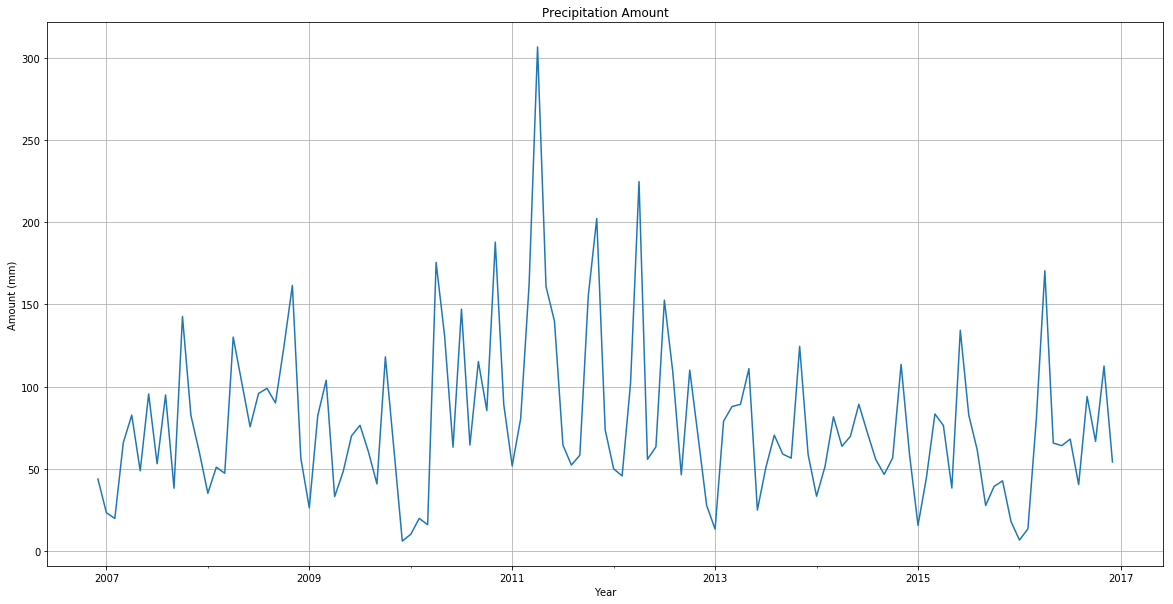

In [124]:
# Choose only last 5 years.
ideamEstacionTime = pd.Series(ideamEstacionAllTime.iloc[-120:])
ideamEstacionPlot=ideamEstacionTime.plot(figsize=(20,10),title='Precipitation Amount', grid=True)
ideamEstacionPlot.set_xlabel('Year')
ideamEstacionPlot.set_ylabel('Amount (mm)')

### Contrasting Cundinamarca Values with ENSO Indices

Text(0,0.5,'Index Value')

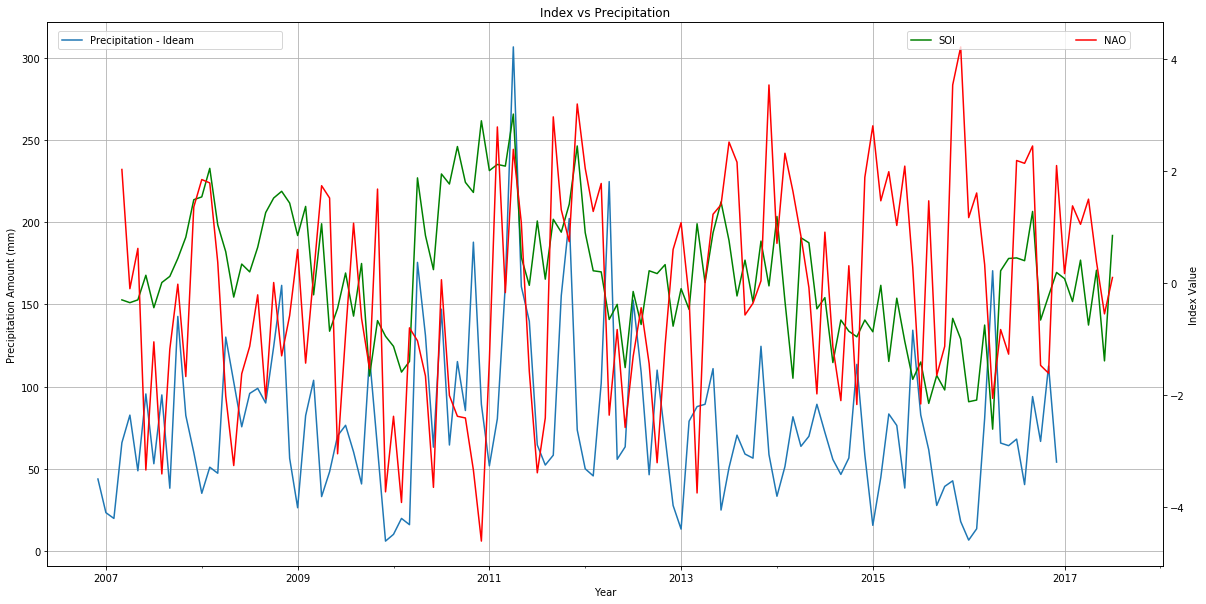

In [152]:
ax1=ideamEstacionTime.plot(figsize=(20,10),label='Precipitation - Ideam',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

soiTime.plot(ax=ax2,color='green',label='SOI')
plt.legend(bbox_to_anchor=(0.1, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
naoTime.plot(ax=ax2,color='red',label='NAO')

plt.legend(bbox_to_anchor=(0.77, 0.95, 0.2, .8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

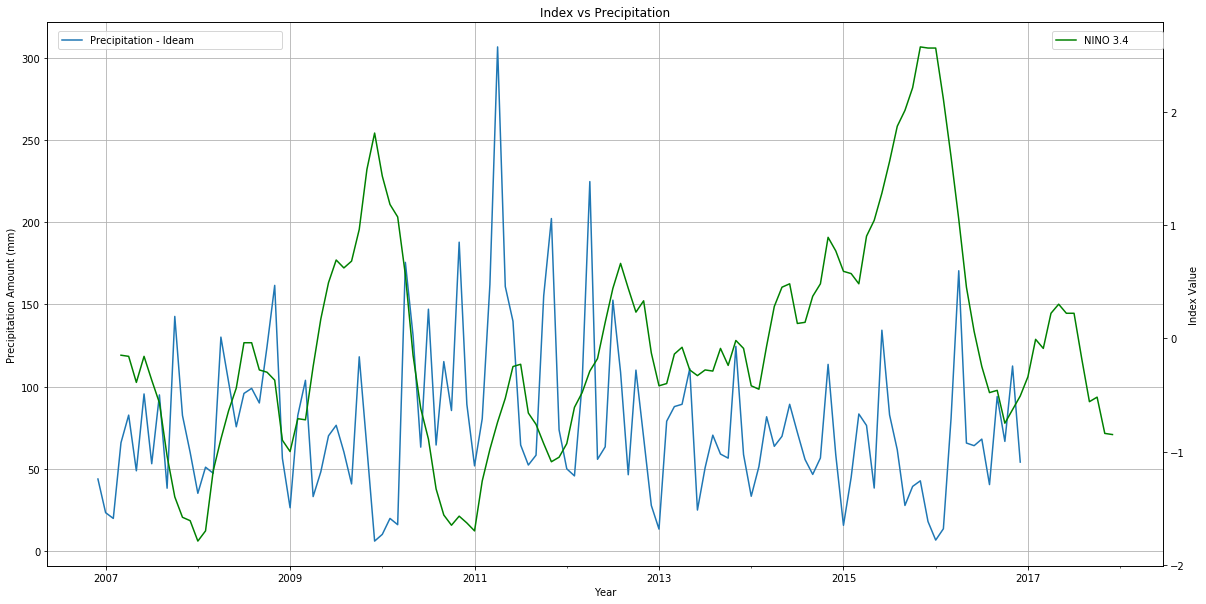

In [151]:
ax1=ideamEstacionTime.plot(figsize=(20,10),label='Precipitation - Ideam',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

nino34Time.plot(ax=ax2,color='green',label='NINO 3.4')
plt.legend(bbox_to_anchor=(0.9, 0.95, 0.1, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')